# Part 1 - Data Cleaning

## Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Loading the raw data

In [2]:
raw_data = pd.read_csv('Red.csv')

In [3]:
raw_data.head()

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016


## Preprocessing

### Exploring the descriptive statistics of the variables

In [4]:
raw_data.describe(include='all')

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
count,8666,8666,8666,8666,8666.000000,8666.000000,8666.000000,8666
unique,6721,30,624,2714,NaN,NaN,NaN,32
top,Cabernet Sauvignon 2017,Italy,Rioja,Errazuriz,NaN,NaN,NaN,2016
freq,43,2650,325,40,NaN,NaN,NaN,1776
mean,NaN,NaN,NaN,NaN,3.890342,415.287445,39.145065,NaN
std,NaN,NaN,NaN,NaN,0.308548,899.726373,84.936307,NaN
min,NaN,NaN,NaN,NaN,2.500000,25.000000,3.550000,NaN
25%,NaN,NaN,NaN,NaN,3.700000,66.000000,10.680000,NaN
50%,NaN,NaN,NaN,NaN,3.900000,157.000000,18.200000,NaN
75%,NaN,NaN,NaN,NaN,4.100000,401.000000,38.142500,NaN


In [5]:
raw_data.dtypes

Name                object
Country             object
Region              object
Winery              object
Rating             float64
NumberOfRatings      int64
Price              float64
Year                object
dtype: object

In [6]:
raw_data['Year'] = pd.to_numeric(raw_data['Year'], errors='coerce')

### Dealing with missing values

In [7]:
raw_data.isnull().sum()

Name               0
Country            0
Region             0
Winery             0
Rating             0
NumberOfRatings    0
Price              0
Year               8
dtype: int64

In [8]:
data_no_mv = raw_data.dropna(axis=0)

In [9]:
data_no_mv.describe(include='all')

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
count,8658,8658,8658,8658,8658.000000,8658.000000,8658.000000,8658.000000
unique,6713,30,623,2713,NaN,NaN,NaN,NaN
top,Cabernet Sauvignon 2017,Italy,Rioja,Errazuriz,NaN,NaN,NaN,NaN
freq,43,2646,325,40,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,3.890148,409.761839,39.149789,2014.818434
std,NaN,NaN,NaN,NaN,0.308429,857.614243,84.963503,3.281252
min,NaN,NaN,NaN,NaN,2.500000,25.000000,3.550000,1988.000000
25%,NaN,NaN,NaN,NaN,3.700000,66.000000,10.682500,2014.000000
50%,NaN,NaN,NaN,NaN,3.900000,157.000000,18.200000,2016.000000
75%,NaN,NaN,NaN,NaN,4.100000,400.750000,38.227500,2017.000000


### Exploring the PDFs

<Axes: xlabel='Price', ylabel='Count'>

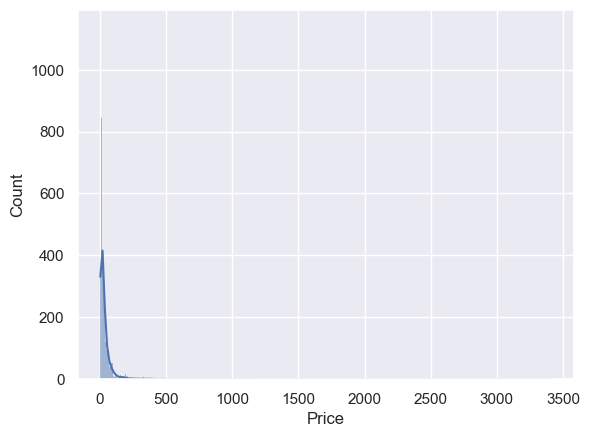

In [10]:
sns.histplot(data_no_mv['Price'],kde=True)

### Dealing with outliers

In [11]:
# Declare a variable that will be equal to the 90th percentile of the 'Price' variable
q = data_no_mv['Price'].quantile(0.99)
# Then we can create a new df, with the condition that all prices must be below the 99 percentile of 'Price'
data_1 = data_no_mv[data_no_mv['Price']<q]
# In this way we have essentially removed the top 1% of the data about 'Price'
data_1.describe(include='all')

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
count,8569,8569,8569,8569,8569.000000,8569.000000,8569.000000,8569.000000
unique,6645,30,622,2705,NaN,NaN,NaN,NaN
top,Cabernet Sauvignon 2017,Italy,Rioja,Errazuriz,NaN,NaN,NaN,NaN
freq,43,2621,324,40,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,3.883265,408.679543,32.801334,2014.887618
std,NaN,NaN,NaN,NaN,0.302179,858.340450,41.487180,3.145528
min,NaN,NaN,NaN,NaN,2.500000,25.000000,3.550000,1988.000000
25%,NaN,NaN,NaN,NaN,3.700000,65.000000,10.630000,2014.000000
50%,NaN,NaN,NaN,NaN,3.900000,157.000000,17.950000,2016.000000
75%,NaN,NaN,NaN,NaN,4.100000,398.000000,37.450000,2017.000000


<Axes: xlabel='Price', ylabel='Count'>

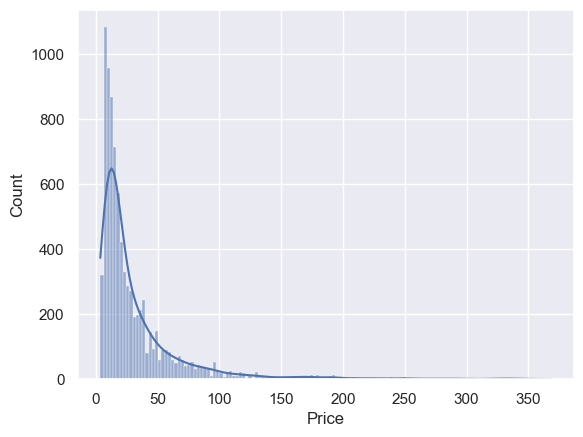

In [12]:
sns.histplot(data_1['Price'],kde=True)

<Axes: xlabel='Rating', ylabel='Count'>

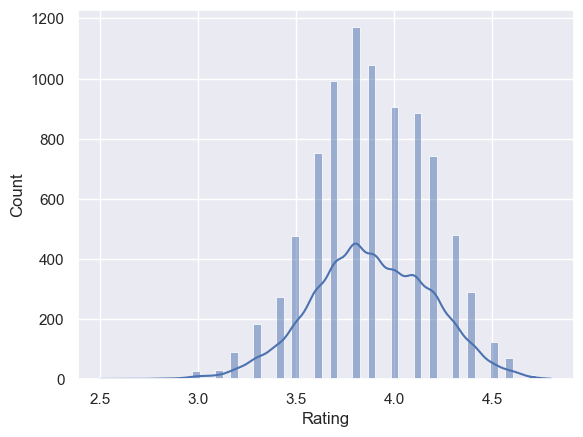

In [13]:
sns.histplot(data_1['Rating'],kde=True)

<Axes: xlabel='NumberOfRatings', ylabel='Count'>

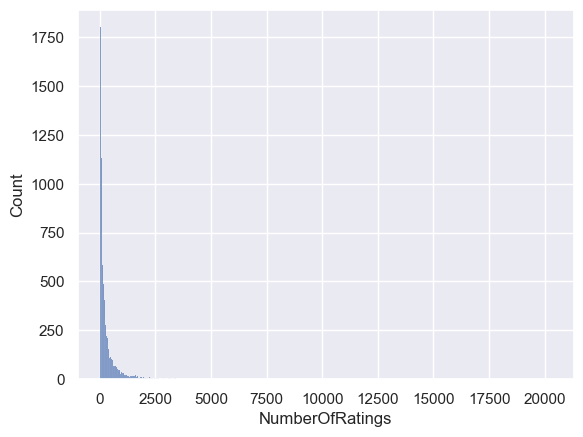

In [14]:
sns.histplot(data_1['NumberOfRatings'])

In [15]:
# Let's declare a variable that will be equal to the 99th percentile of the 'Price' variable
q = data_1['NumberOfRatings'].quantile(0.99)
# Then we can create a new df, with the condition that all prices must be below the 99 percentile of 'Price'
data_2 = data_1[data_1['NumberOfRatings']<q]
# In this way we have essentially removed the top 1% of the data about 'Price'
data_2.describe(include='all')

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
count,8483,8483,8483,8483,8483.000000,8483.000000,8483.000000,8483.000000
unique,6590,30,620,2702,NaN,NaN,NaN,NaN
top,Cabernet Sauvignon 2017,Italy,Rioja,Errazuriz,NaN,NaN,NaN,NaN
freq,42,2594,307,39,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,3.882200,347.929506,32.771766,2014.884239
std,NaN,NaN,NaN,NaN,0.302133,519.387969,41.210753,3.151715
min,NaN,NaN,NaN,NaN,2.500000,25.000000,3.550000,1988.000000
25%,NaN,NaN,NaN,NaN,3.700000,65.000000,10.650000,2014.000000
50%,NaN,NaN,NaN,NaN,3.900000,154.000000,17.950000,2016.000000
75%,NaN,NaN,NaN,NaN,4.100000,383.500000,37.615000,2017.000000


<Axes: xlabel='NumberOfRatings', ylabel='Count'>

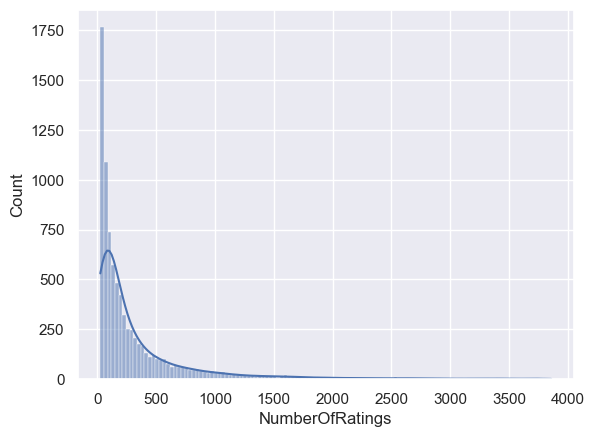

In [16]:
sns.histplot(data_2['NumberOfRatings'],kde=True)

<Axes: xlabel='Year', ylabel='Count'>

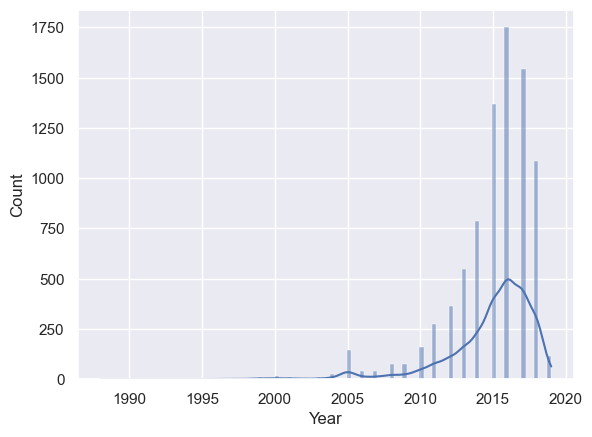

In [17]:
sns.histplot(data_2['Year'], kde=True)

In [18]:
# Outliers are on the low end, Taking off very old vintage wines
q = data_2['Year'].quantile(0.01)
data_3 = data_2[data_2['Year']>q]

<Axes: xlabel='Year', ylabel='Count'>

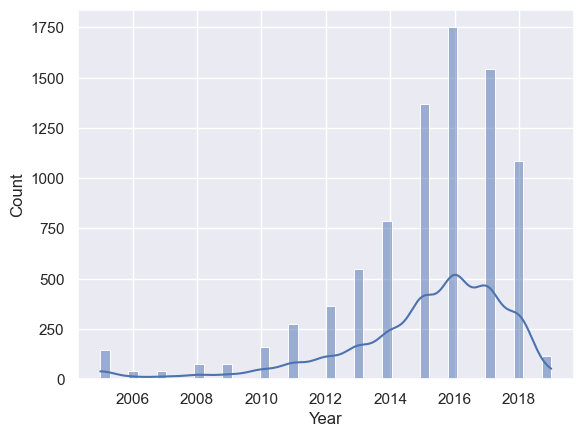

In [19]:
sns.histplot(data_3['Year'], kde=True)

In [20]:
data_cleaned = data_3.reset_index(drop=True)

In [21]:
data_cleaned.describe(include='all')

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
count,8378,8378,8378,8378,8378.000000,8378.000000,8378.000000,8378.000000
unique,6494,30,619,2694,NaN,NaN,NaN,NaN
top,Cabernet Sauvignon 2017,Italy,Rioja,Errazuriz,NaN,NaN,NaN,NaN
freq,42,2587,305,37,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,3.878503,347.829076,31.977637,2015.064813
std,NaN,NaN,NaN,NaN,0.301340,517.363200,40.168796,2.701226
min,NaN,NaN,NaN,NaN,2.500000,25.000000,3.550000,2005.000000
25%,NaN,NaN,NaN,NaN,3.700000,65.000000,10.522500,2014.000000
50%,NaN,NaN,NaN,NaN,3.900000,155.000000,17.890000,2016.000000
75%,NaN,NaN,NaN,NaN,4.100000,385.000000,36.740000,2017.000000


# Part 2 - Checking the OLS assumptions

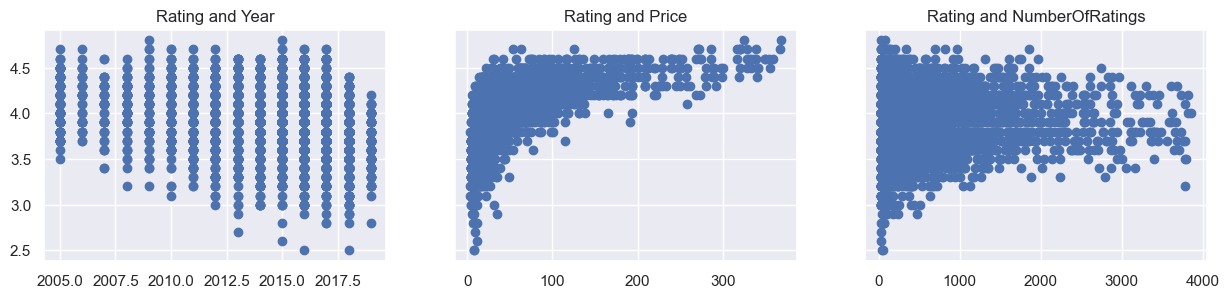

In [22]:
# Rating correlation with other variables
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_cleaned['Year'],data_cleaned['Rating'])
ax1.set_title('Rating and Year')
ax2.scatter(data_cleaned['Price'],data_cleaned['Rating'])
ax2.set_title('Rating and Price')
ax3.scatter(data_cleaned['NumberOfRatings'],data_cleaned['Rating'])
ax3.set_title('Rating and NumberOfRatings')

plt.show()

### Relaxing the assumptions

In [23]:
# transform 'Price' with a log transformation
log_price = np.log(data_cleaned['Price'])

# Then we add it to our data frame
data_cleaned['log_price'] = log_price
data_cleaned

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,log_price
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011.0,4.553877
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017.0,2.740840
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015.0,2.008214
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019.0,2.165619
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016.0,3.372455
...,...,...,...,...,...,...,...,...,...
8373,6th Sense Syrah 2016,United States,Lodi,Michael David Winery,3.8,994,16.47,2016.0,2.801541
8374,Botrosecco Maremma Toscana 2016,Italy,Maremma Toscana,Le Mortelle,4.0,995,20.09,2016.0,3.000222
8375,Haut-Médoc 2010,France,Haut-Médoc,Château Cambon La Pelouse,3.7,996,23.95,2010.0,3.175968
8376,Shiraz 2019,Australia,South Eastern Australia,Yellow Tail,3.5,998,6.21,2019.0,1.826161


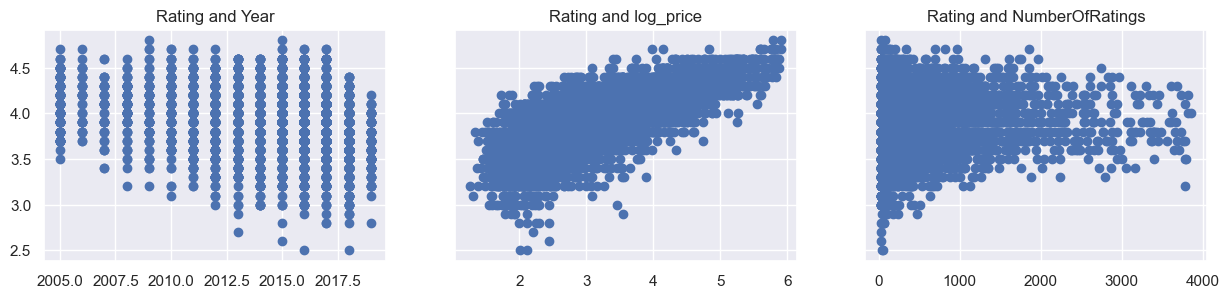

In [24]:
# Rating correlation with other variables
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_cleaned['Year'],data_cleaned['Rating'])
ax1.set_title('Rating and Year')
ax2.scatter(data_cleaned['log_price'],data_cleaned['Rating'])
ax2.set_title('Rating and log_price')
ax3.scatter(data_cleaned['NumberOfRatings'],data_cleaned['Rating'])
ax3.set_title('Rating and NumberOfRatings')

plt.show()

In [25]:
# Let's transform 'log_NumberOfRatings' with a log transformation
log_NumberOfRatings = np.log(data_cleaned['NumberOfRatings'])

# Then we add it to our data frame
data_cleaned['log_NumberOfRatings'] = log_NumberOfRatings
data_cleaned

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,log_price,log_NumberOfRatings
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011.0,4.553877,4.605170
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017.0,2.740840,4.605170
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015.0,2.008214,4.605170
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019.0,2.165619,4.605170
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016.0,3.372455,4.605170
...,...,...,...,...,...,...,...,...,...,...
8373,6th Sense Syrah 2016,United States,Lodi,Michael David Winery,3.8,994,16.47,2016.0,2.801541,6.901737
8374,Botrosecco Maremma Toscana 2016,Italy,Maremma Toscana,Le Mortelle,4.0,995,20.09,2016.0,3.000222,6.902743
8375,Haut-Médoc 2010,France,Haut-Médoc,Château Cambon La Pelouse,3.7,996,23.95,2010.0,3.175968,6.903747
8376,Shiraz 2019,Australia,South Eastern Australia,Yellow Tail,3.5,998,6.21,2019.0,1.826161,6.905753


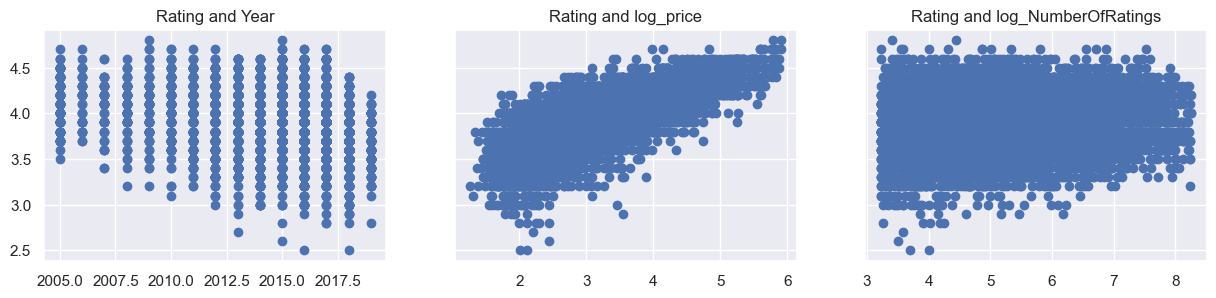

In [26]:
# Rating correlation with other variables
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_cleaned['Year'],data_cleaned['Rating'])
ax1.set_title('Rating and Year')
ax2.scatter(data_cleaned['log_price'],data_cleaned['Rating'])
ax2.set_title('Rating and log_price')
ax3.scatter(data_cleaned['log_NumberOfRatings'],data_cleaned['Rating'])
ax3.set_title('Rating and log_NumberOfRatings')

plt.show()

In [27]:
# Let's transform 'Year' with a log transformation
log_year = np.log(data_cleaned['Year'])

# Then we add it to our data frame
data_cleaned['log_year'] = log_year
data_cleaned

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,log_price,log_NumberOfRatings,log_year
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011.0,4.553877,4.605170,7.606387
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017.0,2.740840,4.605170,7.609367
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015.0,2.008214,4.605170,7.608374
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019.0,2.165619,4.605170,7.610358
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016.0,3.372455,4.605170,7.608871
...,...,...,...,...,...,...,...,...,...,...,...
8373,6th Sense Syrah 2016,United States,Lodi,Michael David Winery,3.8,994,16.47,2016.0,2.801541,6.901737,7.608871
8374,Botrosecco Maremma Toscana 2016,Italy,Maremma Toscana,Le Mortelle,4.0,995,20.09,2016.0,3.000222,6.902743,7.608871
8375,Haut-Médoc 2010,France,Haut-Médoc,Château Cambon La Pelouse,3.7,996,23.95,2010.0,3.175968,6.903747,7.605890
8376,Shiraz 2019,Australia,South Eastern Australia,Yellow Tail,3.5,998,6.21,2019.0,1.826161,6.905753,7.610358


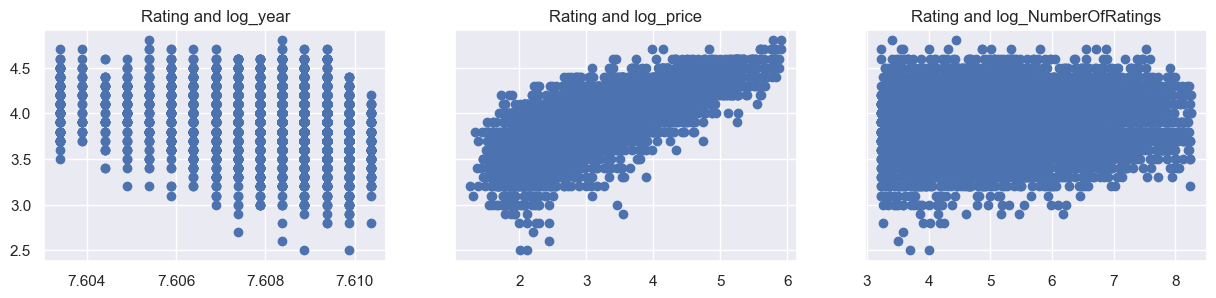

In [28]:
# Rating correlation with other variables
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_cleaned['log_year'],data_cleaned['Rating'])
ax1.set_title('Rating and log_year')
ax2.scatter(data_cleaned['log_price'],data_cleaned['Rating'])
ax2.set_title('Rating and log_price')
ax3.scatter(data_cleaned['log_NumberOfRatings'],data_cleaned['Rating'])
ax3.set_title('Rating and log_NumberOfRatings')

plt.show()

In [29]:
## drop log_NumberOfRatings and Price from the data
data_cleaned = data_cleaned.drop(['log_year'],axis=1)

In [30]:
data_cleaned.describe(include='all')

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,log_price,log_NumberOfRatings
count,8378,8378,8378,8378,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000
unique,6494,30,619,2694,NaN,NaN,NaN,NaN,NaN,NaN
top,Cabernet Sauvignon 2017,Italy,Rioja,Errazuriz,NaN,NaN,NaN,NaN,NaN,NaN
freq,42,2587,305,37,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,3.878503,347.829076,31.977637,2015.064813,3.031069,5.132148
std,NaN,NaN,NaN,NaN,0.301340,517.363200,40.168796,2.701226,0.862471,1.169302
min,NaN,NaN,NaN,NaN,2.500000,25.000000,3.550000,2005.000000,1.266948,3.218876
25%,NaN,NaN,NaN,NaN,3.700000,65.000000,10.522500,2014.000000,2.353516,4.174387
50%,NaN,NaN,NaN,NaN,3.900000,155.000000,17.890000,2016.000000,2.884242,5.043425
75%,NaN,NaN,NaN,NaN,4.100000,385.000000,36.740000,2017.000000,3.603866,5.953243


### Multicollinearity

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# we will explore only numerical data so far
variables = data_cleaned[['log_price','Year','log_NumberOfRatings']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,13.301864,log_price
1,31.581698,Year
2,20.264805,log_NumberOfRatings


In [32]:
# vif is very high, we will check simple correlation
data_cleaned[['log_price','Year','log_NumberOfRatings']].corr()

,log_price,Year,log_NumberOfRatings
log_price,1.000000,-0.510362,0.028568
Year,-0.510362,1.000000,-0.089807
log_NumberOfRatings,0.028568,-0.089807,1.000000


In [33]:
data_no_multicollinearity = data_cleaned

# Part 3 - Create Dummy Variables

In [34]:
data_no_multicollinearity.describe(include='all')

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,log_price,log_NumberOfRatings
count,8378,8378,8378,8378,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000
unique,6494,30,619,2694,NaN,NaN,NaN,NaN,NaN,NaN
top,Cabernet Sauvignon 2017,Italy,Rioja,Errazuriz,NaN,NaN,NaN,NaN,NaN,NaN
freq,42,2587,305,37,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,3.878503,347.829076,31.977637,2015.064813,3.031069,5.132148
std,NaN,NaN,NaN,NaN,0.301340,517.363200,40.168796,2.701226,0.862471,1.169302
min,NaN,NaN,NaN,NaN,2.500000,25.000000,3.550000,2005.000000,1.266948,3.218876
25%,NaN,NaN,NaN,NaN,3.700000,65.000000,10.522500,2014.000000,2.353516,4.174387
50%,NaN,NaN,NaN,NaN,3.900000,155.000000,17.890000,2016.000000,2.884242,5.043425
75%,NaN,NaN,NaN,NaN,4.100000,385.000000,36.740000,2017.000000,3.603866,5.953243


In [35]:
data_no_multicollinearity.drop(['Name','Region','Winery'],axis=1,inplace=True)

In [36]:
print("🔍 Unique countries and their counts:")
print(data_no_multicollinearity['Country'].value_counts(dropna=False))

🔍 Unique countries and their counts:
Country
Italy            2587
France           2140
Spain            1099
South Africa      495
United States     353
Chile             316
Germany           248
Australia         240
Argentina         235
Portugal          227
Austria           220
New Zealand        63
Brazil             39
Romania            23
Israel             13
Greece             13
Switzerland        12
Hungary             9
Moldova             8
Slovenia            8
Lebanon             6
Turkey              6
Georgia             5
Uruguay             4
Croatia             2
Bulgaria            2
Canada              2
Mexico              1
China               1
Slovakia            1
Name: count, dtype: int64


In [37]:
print("Number of null (missing) values in 'Country':")
print(data_no_multicollinearity['Country'].isnull().sum())

Number of null (missing) values in 'Country':
0


In [38]:
## Group Countries with less than 100 wines into Other group to eliminate Noise and avoid overfitting
# Count how many times each country appears
country_counts = data_no_multicollinearity['Country'].value_counts()

# Define a threshold (e.g., < 100)
threshold = 100
rare_countries = country_counts[country_counts < threshold].index

# Replace rare countries with 'Other'
data_no_multicollinearity['Country_cleaned'] = data_no_multicollinearity['Country'].replace(rare_countries, 'Other')

In [39]:
data_no_multicollinearity.head()

,Country,Rating,NumberOfRatings,Price,Year,log_price,log_NumberOfRatings,Country_cleaned
0,France,4.2,100,95.00,2011.0,4.553877,4.60517,France
1,France,4.3,100,15.50,2017.0,2.740840,4.60517,France
2,Italy,3.9,100,7.45,2015.0,2.008214,4.60517,Italy
3,Italy,3.5,100,8.72,2019.0,2.165619,4.60517,Italy
4,Austria,3.9,100,29.15,2016.0,3.372455,4.60517,Austria


In [40]:
print("🔍 Unique countries and their counts:")
print(data_no_multicollinearity['Country_cleaned'].value_counts(dropna=False))

🔍 Unique countries and their counts:
Country_cleaned
Italy            2587
France           2140
Spain            1099
South Africa      495
United States     353
Chile             316
Germany           248
Australia         240
Argentina         235
Portugal          227
Austria           220
Other             218
Name: count, dtype: int64


In [41]:
# Drop the original 'Country' column
data_no_multicollinearity = data_no_multicollinearity.drop('Country', axis=1)

# Rename 'Country_cleaned' to 'Country'
data_no_multicollinearity = data_no_multicollinearity.rename(columns={'Country_cleaned': 'Country'})

In [42]:
# Create Dummy Variables and make sure one of dominant ones is out

data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [43]:
data_with_dummies.head()

,Rating,NumberOfRatings,Price,Year,log_price,log_NumberOfRatings,Country_Australia,Country_Austria,Country_Chile,Country_France,Country_Germany,Country_Italy,Country_Other,Country_Portugal,Country_South Africa,Country_Spain,Country_United States
0,4.2,100,95.00,2011.0,4.553877,4.60517,False,False,False,True,False,False,False,False,False,False,False
1,4.3,100,15.50,2017.0,2.740840,4.60517,False,False,False,True,False,False,False,False,False,False,False
2,3.9,100,7.45,2015.0,2.008214,4.60517,False,False,False,False,False,True,False,False,False,False,False
3,3.5,100,8.72,2019.0,2.165619,4.60517,False,False,False,False,False,True,False,False,False,False,False
4,3.9,100,29.15,2016.0,3.372455,4.60517,False,True,False,False,False,False,False,False,False,False,False


In [58]:
## Convert dummy values from booleans into integers
data_preprocessed = data_with_dummies.astype({col: int for col in data_with_dummies.select_dtypes(include='bool').columns})

In [59]:
data_preprocessed.head()

,Rating,NumberOfRatings,Price,Year,log_price,log_NumberOfRatings,Country_Australia,Country_Austria,Country_Chile,Country_France,Country_Germany,Country_Italy,Country_Other,Country_Portugal,Country_South Africa,Country_Spain,Country_United States
0,4.2,100,95.00,2011.0,4.553877,4.60517,0,0,0,1,0,0,0,0,0,0,0
1,4.3,100,15.50,2017.0,2.740840,4.60517,0,0,0,1,0,0,0,0,0,0,0
2,3.9,100,7.45,2015.0,2.008214,4.60517,0,0,0,0,0,1,0,0,0,0,0
3,3.5,100,8.72,2019.0,2.165619,4.60517,0,0,0,0,0,1,0,0,0,0,0
4,3.9,100,29.15,2016.0,3.372455,4.60517,0,1,0,0,0,0,0,0,0,0,0


In [60]:
# Check VIF of all independent variables
variables = data_preprocessed.drop(['Rating','NumberOfRatings','Price','log_NumberOfRatings'],axis=1)
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif

,VIF,features
0,46.524394,Year
1,14.612821,log_price
2,2.025184,Country_Australia
3,1.936499,Country_Austria
4,2.344467,Country_Chile
5,10.261812,Country_France
6,2.055401,Country_Germany
7,12.024942,Country_Italy
8,1.927828,Country_Other
9,1.964855,Country_Portugal


In [47]:
# Price has high VIF, but we will keep it since we build Predictive and not Inference Model

In [48]:
# drop log_year as no difference from Year
data_preprocessed = data_preprocessed.drop(['NumberOfRatings','Price','log_NumberOfRatings'],axis=1)
data_preprocessed

,Rating,Year,log_price,Country_Australia,Country_Austria,Country_Chile,Country_France,Country_Germany,Country_Italy,Country_Other,Country_Portugal,Country_South Africa,Country_Spain,Country_United States
0,4.2,2011.0,4.553877,0,0,0,1,0,0,0,0,0,0,0
1,4.3,2017.0,2.740840,0,0,0,1,0,0,0,0,0,0,0
2,3.9,2015.0,2.008214,0,0,0,0,0,1,0,0,0,0,0
3,3.5,2019.0,2.165619,0,0,0,0,0,1,0,0,0,0,0
4,3.9,2016.0,3.372455,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,3.8,2016.0,2.801541,0,0,0,0,0,0,0,0,0,0,1
8374,4.0,2016.0,3.000222,0,0,0,0,0,1,0,0,0,0,0
8375,3.7,2010.0,3.175968,0,0,0,1,0,0,0,0,0,0,0
8376,3.5,2019.0,1.826161,1,0,0,0,0,0,0,0,0,0,0


# Part 4 - Linear Regression Model

### Declare the inputs and the targets

In [49]:
# The target(s) (dependent variable) is 'Rating'
targets = data_preprocessed['Rating']

# The inputs are everything BUT the dependent variable, so we can simply drop it
inputs = data_preprocessed.drop(['Rating'],axis=1)

### Scale the data

In [50]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)

StandardScaler()

In [51]:
# Scale the features and store them in a new variable (the actual scaling procedure)
inputs_scaled = scaler.transform(inputs)

### Train Test Split

In [52]:
# Import the module for the split
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
# To have the same split as mine, use random_state = 365
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

### Create the regression

In [53]:
# Create a linear regression object
reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train,y_train)

LinearRegression()

In [54]:
# Let's check the outputs of the regression
# I'll store them in y_hat as this is the 'theoretical' name of the predictions
y_hat = reg.predict(x_train)

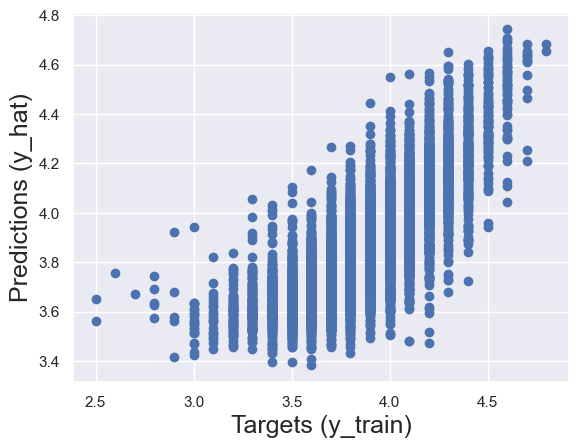

In [55]:
# Compare the targets (y_train) and the predictions (y_hat)
plt.scatter(y_train, y_hat)

plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)

plt.show()

Text(0.5, 1.0, 'Residuals PDF')

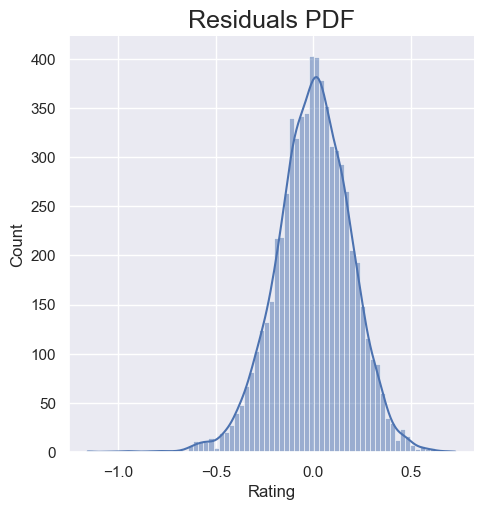

In [61]:
# Another useful check of our model is a residual plot
# Plot the PDF of the residuals and check for anomalies
sns.displot(y_train - y_hat, kde=True)

# Include a title
plt.title("Residuals PDF", size=18)

# The plot is normally distributed
# There is no disbalance between overpredictions and underpredictions

In [62]:
# Find the R-squared of the model
reg.score(x_train,y_train)

0.5958433745865119

### Finding the weights and bias

In [65]:
# Obtain the bias (intercept) of the regression
reg.intercept_

3.8779799926354075

In [66]:
# Obtain the weights (coefficients) of the regression
reg.coef_

array([ 0.02854757,  0.24856086, -0.01669286, -0.00991322, -0.00896029,
       -0.03904255, -0.01569168,  0.01006106, -0.02299361,  0.01252331,
        0.00165269,  0.0024858 , -0.01012073])

In [67]:
# Create a regression summary where we can compare them with one-another
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Year,0.028548
1,log_price,0.248561
2,Country_Australia,-0.016693
3,Country_Austria,-0.009913
4,Country_Chile,-0.008960
5,Country_France,-0.039043
6,Country_Germany,-0.015692
7,Country_Italy,0.010061
8,Country_Other,-0.022994
9,Country_Portugal,0.012523


## Testing

In [68]:
# Our test inputs are 'x_test', while the outputs: 'y_test' 
y_hat_test = reg.predict(x_test)

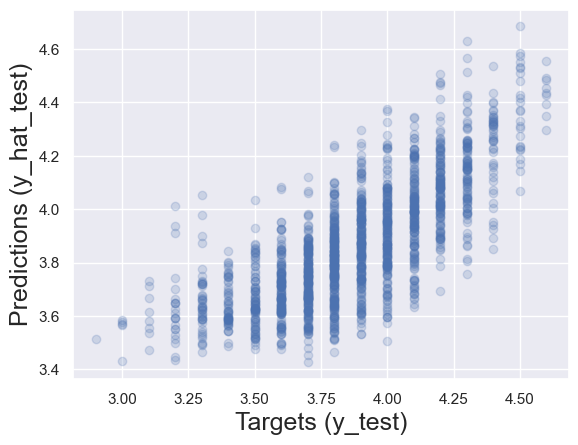

In [69]:
# Create a scatter plot with the test targets and the test predictions
# Include the argument 'alpha' which will introduce opacity to the graph
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.show()

In [74]:
# Manually check these predictions
# To obtain the actual prices, take the exponential of the log_price
df_pf = pd.DataFrame(y_hat_test, columns=['Prediction'])
df_pf.head()

,Prediction
0,4.323570
1,3.791328
2,3.933898
3,3.531997
4,3.970417


In [77]:
# Include the test targets in that data frame (so we can manually compare them)
df_pf['Target'] = y_test
y_test = y_test.reset_index(drop=True)
df_pf

,Prediction,Target
0,4.323570,4.3
1,3.791328,3.8
2,3.933898,3.8
3,3.531997,3.9
4,3.970417,3.9
...,...,...
1671,3.655699,3.5
1672,3.897317,3.9
1673,4.348234,4.6
1674,3.655550,3.8


In [78]:
# Calculate the difference between the targets and the predictions
# This is actually the residual ( already plotted before)
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [79]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,4.323570,4.3,-0.023570,0.548136
1,3.791328,3.8,0.008672,0.228205
2,3.933898,3.8,-0.133898,3.523619
3,3.531997,3.9,0.368003,9.435974
4,3.970417,3.9,-0.070417,1.805573
...,...,...,...,...
1671,3.655699,3.5,-0.155699,4.448549
1672,3.897317,3.9,0.002683,0.068795
1673,4.348234,4.6,0.251766,5.473167
1674,3.655550,3.8,0.144450,3.801305


In [80]:
# Exploring the descriptives
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,1676.000000,1676.000000,1676.000000,1676.000000
mean,3.866836,3.869451,0.002616,4.030559
std,0.222454,0.296946,0.195517,3.426409
min,3.426220,2.900000,-0.813118,0.002533
25%,3.689429,3.700000,-0.118451,1.505327
50%,3.839812,3.900000,0.011001,3.239149
75%,4.011004,4.100000,0.135345,5.599892
max,4.684526,4.600000,0.548683,25.409924


In [81]:
# Check outputs manually
# Display all rows
pd.set_option('display.max_rows', None)
# Display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
662,4.10,4.10,0.00,0.00
1453,3.90,3.90,-0.00,0.02
878,4.20,4.20,0.00,0.02
438,4.00,4.00,0.00,0.02
256,3.80,3.80,0.00,0.03
568,4.40,4.40,-0.00,0.03
260,3.80,3.80,0.00,0.03
1017,4.00,4.00,-0.00,0.03
1056,3.80,3.80,-0.00,0.03
1557,4.30,4.30,-0.00,0.03


Text(0.5, 1.0, 'Residuals Testing PDF')

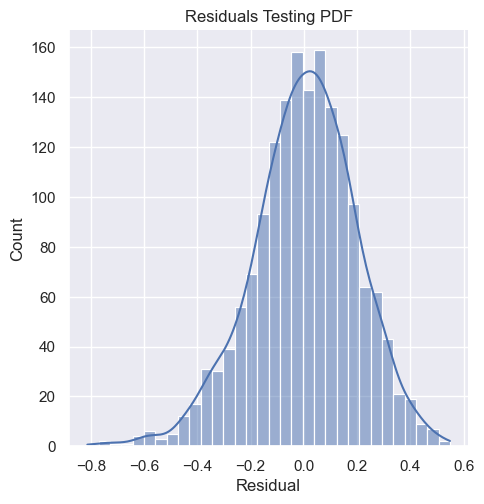

In [83]:
sns.displot(df_pf['Residual'], kde=True)
# Include a title
plt.title("Residuals Testing PDF")

In [84]:
# The model tends to predict slighly higher Rating, based on Price,Year and Country. 
# Some additional regressor like "Good Harvest Year", or Winery can be contributing 

# Part 5 - Analysis & Summary

In [85]:
reg.score(x_train,y_train)

0.5958433745865119

In [86]:
# Calculating adjusted
def adj_r2(x,y):
    r2 = reg.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [87]:
adj_r2(x_train,y_train)

0.5950577830598409

In [88]:
# R-squared is only slightly larger than the Adjusted R-squared, 
# implying that we were not penalized a lot for the inclusion of independent variables.

### Calculate P-values of Coefficients

In [89]:
# Performed through Feature Selection

In [90]:
from sklearn.feature_selection import f_regression

In [91]:
f_regression(x_train, y_train)

(array([7.16614120e+02, 8.43518536e+03, 7.59173704e+00, 1.03766743e+01,
        3.59925451e+01, 3.12504852e+01, 2.46442330e+01, 4.58754071e+01,
        4.43914480e+01, 2.49931636e-01, 4.57929439e+00, 2.72897503e+01,
        2.11328797e+01]),
 array([4.54246620e-150, 0.00000000e+000, 5.87948429e-003, 1.28227160e-003,
        2.08398952e-009, 2.35721767e-008, 7.06548724e-007, 1.36725735e-011,
        2.90227224e-011, 6.17139637e-001, 3.23965508e-002, 1.80419973e-007,
        4.36372591e-006]))

In [92]:
p_values = f_regression(x_train, y_train)[1]
p_values.round(3)

array([0.   , 0.   , 0.006, 0.001, 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.617, 0.032, 0.   , 0.   ])

In [94]:
reg_summary['p-values'] = p_values
reg_summary

,Features,Weights,p-values
0,Year,0.03,0.00
1,log_price,0.25,0.00
2,Country_Australia,-0.02,0.01
3,Country_Austria,-0.01,0.00
4,Country_Chile,-0.01,0.00
5,Country_France,-0.04,0.00
6,Country_Germany,-0.02,0.00
7,Country_Italy,0.01,0.00
8,Country_Other,-0.02,0.00
9,Country_Portugal,0.01,0.62


In [ ]:
# Country_Portugal does not have a significant value and can be dropped
# However Standardizing takes care of the weight of unuseful variables
# Practically p-values are not necessary to be calculated when StandardScaler is used